In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Global Variables

In [2]:
RANDOM_STATE = 0

# Data Loading

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Shape

In [4]:
train.shape

(614, 13)

In [5]:
test.shape

(367, 12)

## Data Types

In [6]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 no

## Data Header

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Numerical Fields Summary

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Exploratory Data Analysis

# Class Distribution

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

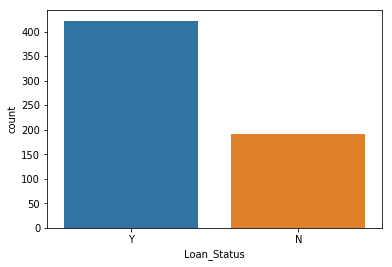

In [11]:
sns.countplot(train['Loan_Status'],label="Loan_Status")

## Missing Data

In [12]:
print('Train:', train.isnull().values.any())
print('Test:', test.isnull().values.any())

Train: True
Test: True


In [13]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Feature', 'Total']
missing_df['Percentage'] = ((missing_df['Total'] / train.shape[0])*100)
missing_df.sort_values('Percentage', ascending=False, inplace=True)
missing_df

,Feature,Total,Percentage
10,Credit_History,50,8.143322
5,Self_Employed,32,5.211726
8,LoanAmount,22,3.583062
3,Dependents,15,2.442997
9,Loan_Amount_Term,14,2.280130
1,Gender,13,2.117264
2,Married,3,0.488599
0,Loan_ID,0,0.000000
4,Education,0,0.000000
6,ApplicantIncome,0,0.000000


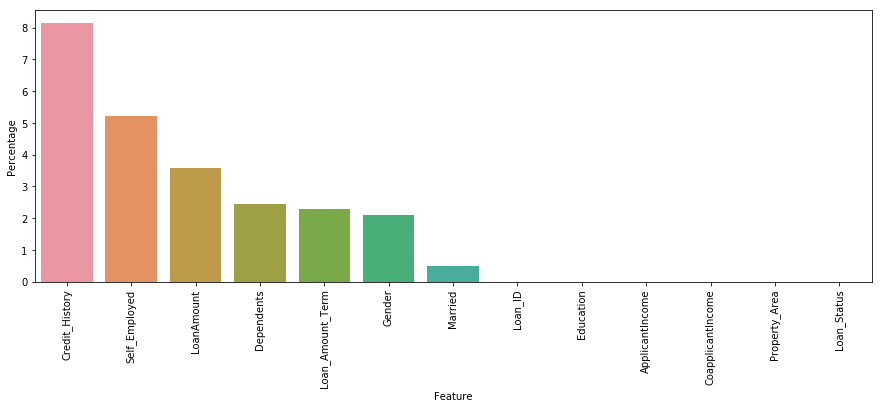

In [14]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=missing_df['Feature'], y=missing_df['Percentage'])

## Imputing Missing Data

In [15]:
train.drop_duplicates(inplace = True)
train.dropna(inplace=True)

# Data Cleaning

In [16]:
train['Dependents'] = train['Dependents'].str.replace("+","")
test['Dependents'] = test['Dependents'].str.replace("+","")

# Extreme Values

## Outliers

## Log Transformation

In [17]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['ApplicantIncome'] = np.log(train['ApplicantIncome'])
#train['CoapplicantIncome'] = np.log(train['CoapplicantIncome'])

# Categorical Features Analysis

## Gender Analysis

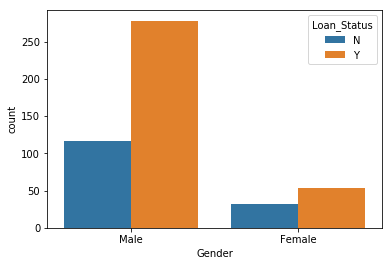

In [18]:
sns.countplot(x="Gender", hue="Loan_Status", data=train)

# Numerical Features Analysis

## Univariate Plots Distribution

### Distribution Plots

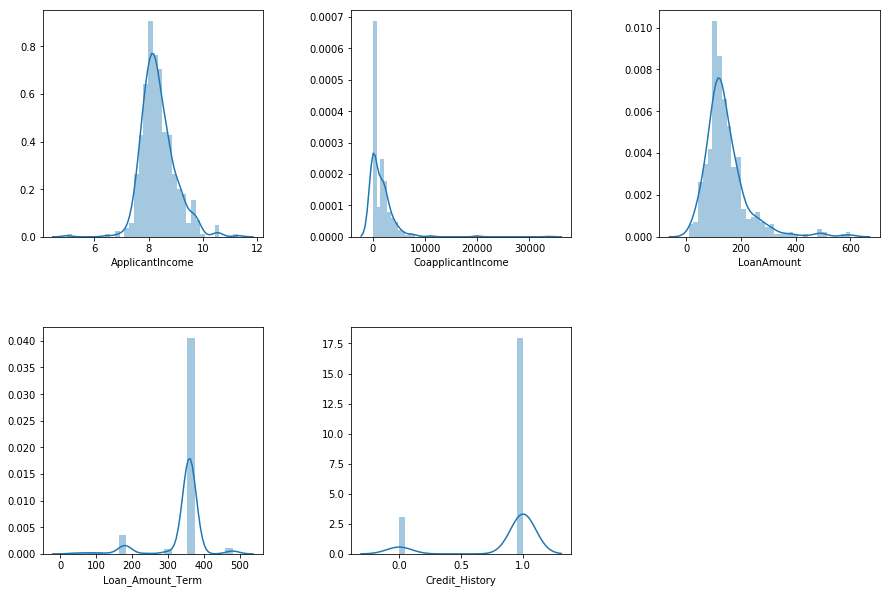

In [19]:
fig = plt.figure(figsize =(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

sns.distplot(train['ApplicantIncome'],label="Loan_Status", ax=ax1)
sns.distplot(train['CoapplicantIncome'],label="Loan_Status", ax=ax2)
sns.distplot(train['LoanAmount'].dropna(),label="Loan_Status", ax=ax3)
sns.distplot(train['Loan_Amount_Term'].dropna(),label="Loan_Status", ax=ax4)
sns.distplot(train['Credit_History'].dropna(),label="Loan_Status", ax=ax5)

### Box Plots

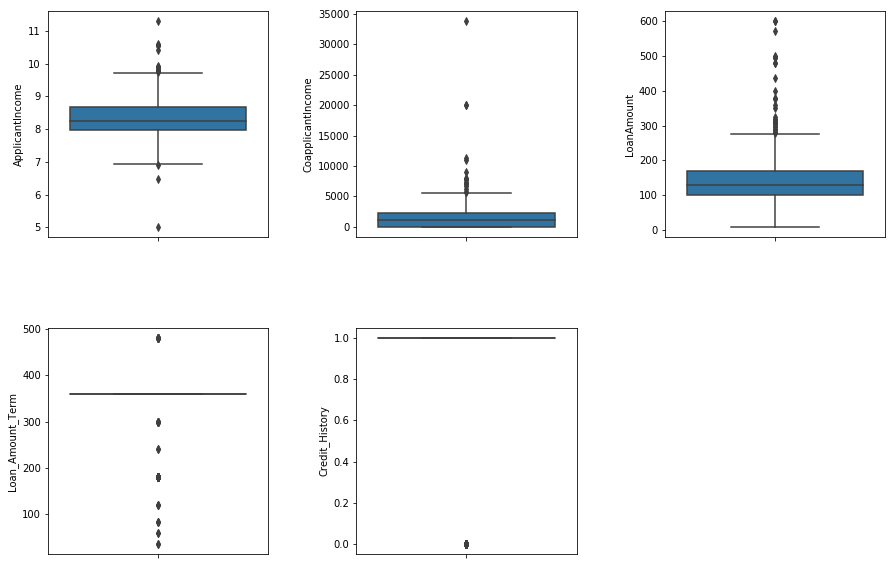

In [20]:
fig = plt.figure(figsize =(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

sns.boxplot(y=train['ApplicantIncome'], ax=ax1)
sns.boxplot(y=train['CoapplicantIncome'], ax=ax2)
sns.boxplot(y=train['LoanAmount'].dropna(), ax=ax3)
sns.boxplot(y=train['Loan_Amount_Term'].dropna(), ax=ax4)
sns.boxplot(y=train['Credit_History'].dropna(), ax=ax5)

## Multivariate Plots Distribution

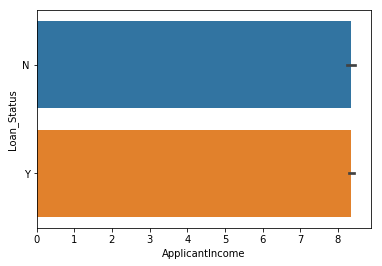

In [21]:
sns.barplot(x = "ApplicantIncome", 
            y = "Loan_Status", 
            data=train, 
            linewidth=2)

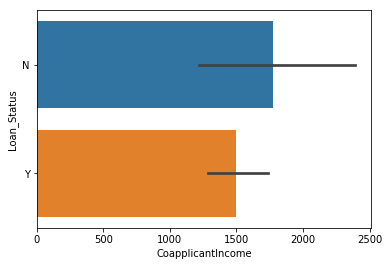

In [22]:
sns.barplot(x = "CoapplicantIncome", 
            y = "Loan_Status", 
            data=train, 
            linewidth=2)

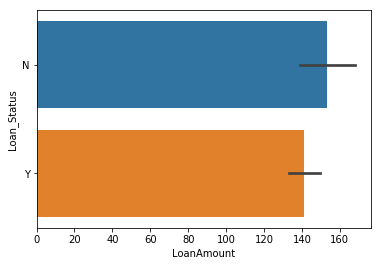

In [23]:
sns.barplot(x = "LoanAmount", 
            y = "Loan_Status", 
            data=train, 
            linewidth=2)

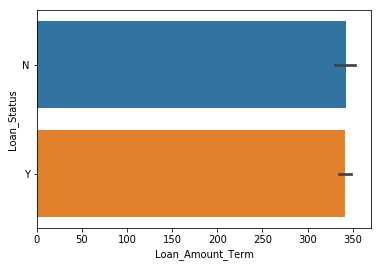

In [24]:
sns.barplot(x = "Loan_Amount_Term", 
            y = "Loan_Status", 
            data=train, 
            linewidth=2)

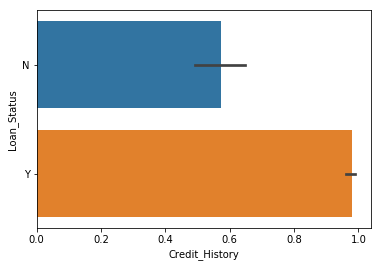

In [25]:
sns.barplot(x = "Credit_History", 
            y = "Loan_Status", 
            data=train, 
            linewidth=2)

### Scatter Matrix

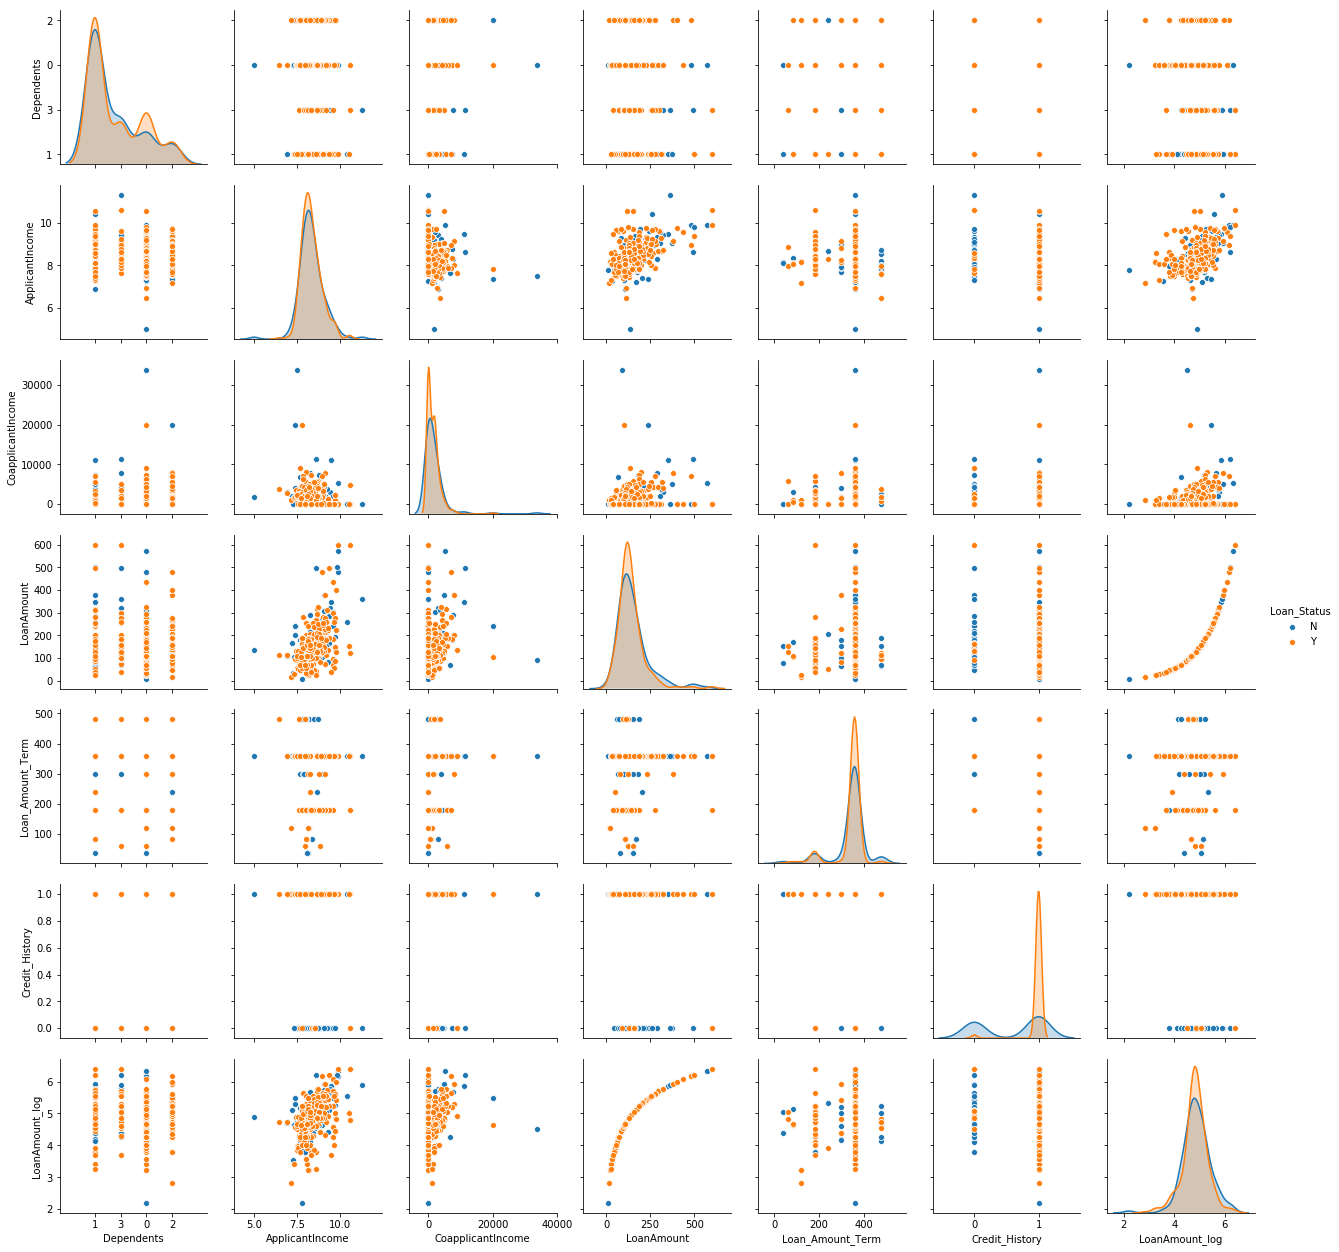

In [26]:
sns.pairplot(train, hue = 'Loan_Status')

# Correlations